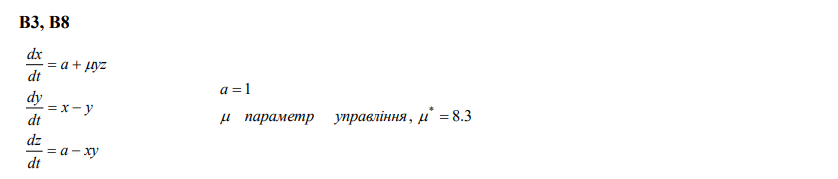

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact
import sympy as sp

In [43]:

x, y, z, m = sp.symbols('x y z m', real=True)
a = 1
m_star = 8.3

In [26]:
eq1 = sp.Eq(a + m*y*z, 0)
eq2 = sp.Eq(x - y, 0)
eq3 = sp.Eq(a - x*y, 0)

аналітично


In [27]:
solutions = sp.solve([eq1, eq2, eq3], (x, y, z), dict=True)
solutions

[{x: -1, y: -1, z: 1/m}, {x: 1, y: 1, z: -1/m}]

чисельні

In [28]:
numerical_points = [(float(sol[x]), float(sol[y]), float(sol[z].subs(m, m_star)))
                    for sol in solutions]
numerical_points

[(-1.0, -1.0, 0.12048192771084336), (1.0, 1.0, -0.12048192771084336)]

Дослідити динаміку системи залежно від параметру управління 0<m=<m*, використовуючи
елемент управління Slider (для системи Matcad), або зафіксувавши кілька значень параметру у
вказаному діапазоні. Для цього необхідно зафіксувати початкове значення змінних для фіксованих
значень параметрів (наприклад, взявши в якості початкових значень точу з одиничними
координатами - для 3-вимірних систем т.(1,1,1)).

In [29]:
%reset -f

In [30]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact

In [31]:
a = 1
x0, y0, z0 = 1, 1, 1
t_max = 50
n_steps = 5000
m_values = [0.1, 0.5, 1, 2, 4, 8.3]

In [32]:
def system_for_3_2(t, v, a, m):
    x, y, z = v
    dx = a + m*y*z
    dy = x - y
    dz = a - x*y
    return [dx, dy, dz]

In [33]:
def solve_system_for_3_2(a, m, x0, y0, z0, t_max=50, n_steps=5000):
    t = np.linspace(0, t_max, n_steps)
    sol = solve_ivp(lambda t, v: system_for_3_2(t, v, a, m),
                    [0, t_max],
                    [x0, y0, z0],
                    t_eval=t)
    x, y, z = sol.y
    return t, x, y, z

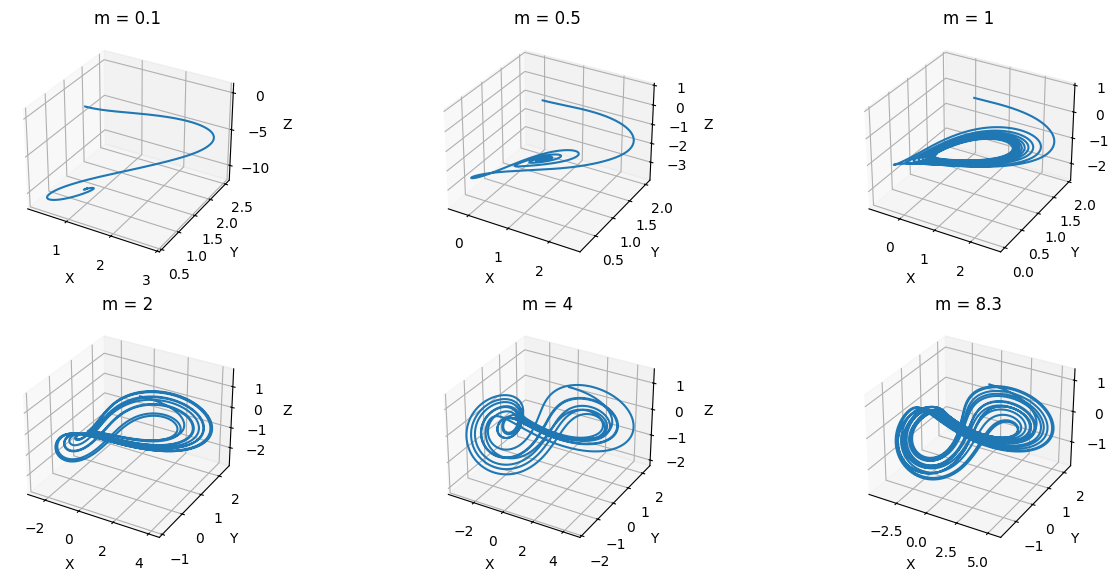

In [34]:
fig = plt.figure(figsize=(14, 6))

for i, m in enumerate(m_values):
    t, x, y, z = solve_system_for_3_2(a, m, x0, y0, z0, t_max, n_steps)
    ax = fig.add_subplot(2, len(m_values)//2 + len(m_values)%2, i+1, projection='3d')
    ax.plot(x, y, z)
    ax.set_title(f'm = {m}')
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

plt.tight_layout(pad=2.08)
plt.show()

In [35]:
def plot_system(m=1.0):
    t, x, y, z = solve_system_for_3_2(a, m, x0, y0, z0, t_max, n_steps)

    fig = plt.figure(figsize=(12,5))

    # 3D фазовий портрет
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    ax1.plot(x, y, z, label='траєкторія')
    # стаціонарні точки
    if m != 0:
        ax1.scatter(1, 1, -1/m, color='red', s=50, label='стац. точка (1,1,-1/m)')
        ax1.scatter(-1, -1, 1/m, color='green', s=50, label='стац. точка (-1,-1,1/m)')
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
    ax1.set_title(f'3D фазовий портрет, m={m:.2f}')
    ax1.legend()

    # Графіки x(t), y(t), z(t)
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(t, x, label='x(t)')
    ax2.plot(t, y, label='y(t)')
    ax2.plot(t, z, label='z(t)')
    ax2.set_xlabel('t'); ax2.set_title(f'Чисельний розв’язок, m={m:.2f}')
    ax2.grid(); ax2.legend()

    plt.tight_layout()
    plt.show()

#слайдер для m від 0 до 8.3
interact(plot_system, m=(0.01, 8.3, 0.01))

interactive(children=(FloatSlider(value=1.0, description='m', max=8.3, min=0.01, step=0.01), Output()), _dom_c…

<function __main__.plot_system(m=1.0)>

Знайти чисельний розв’язок системи, побудувати графіки розв’язків, фазовий портрет (X-Y-Z) та
проекції фазового портрету на площини Z-X, Z-Y, Y-X для фіксованих значень параметрів і
критичного значення m=m* та порівняти тип динаміки із результатами, одержаними в завданні 2.


In [36]:
m_star = 8.3
cases = [(1000, "1000 кроків"), (5000, "5000 кроків")]

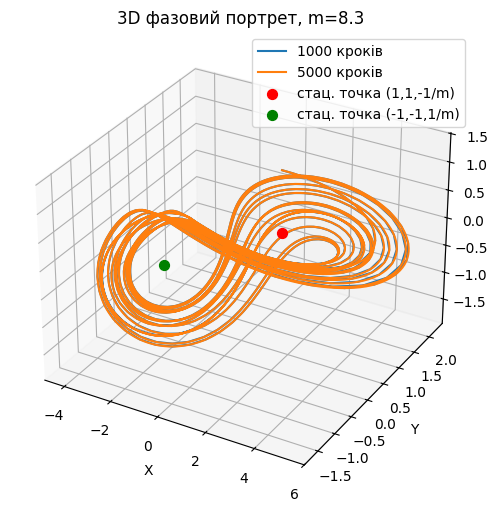

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for n, label in cases:
    t, x, y, z = solve_system_for_3_2(a, m, x0, y0, z0, t_max, n)
    ax.plot(x, y, z, label=f"{label}")
# Стаціонарні точки
ax.scatter(1, 1, -1/m, color='red', s=50, label='стац. точка (1,1,-1/m)')
ax.scatter(-1, -1, 1/m, color='green', s=50, label='стац. точка (-1,-1,1/m)')

ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title(f"3D фазовий портрет, m={m}")
ax.legend()
plt.show()

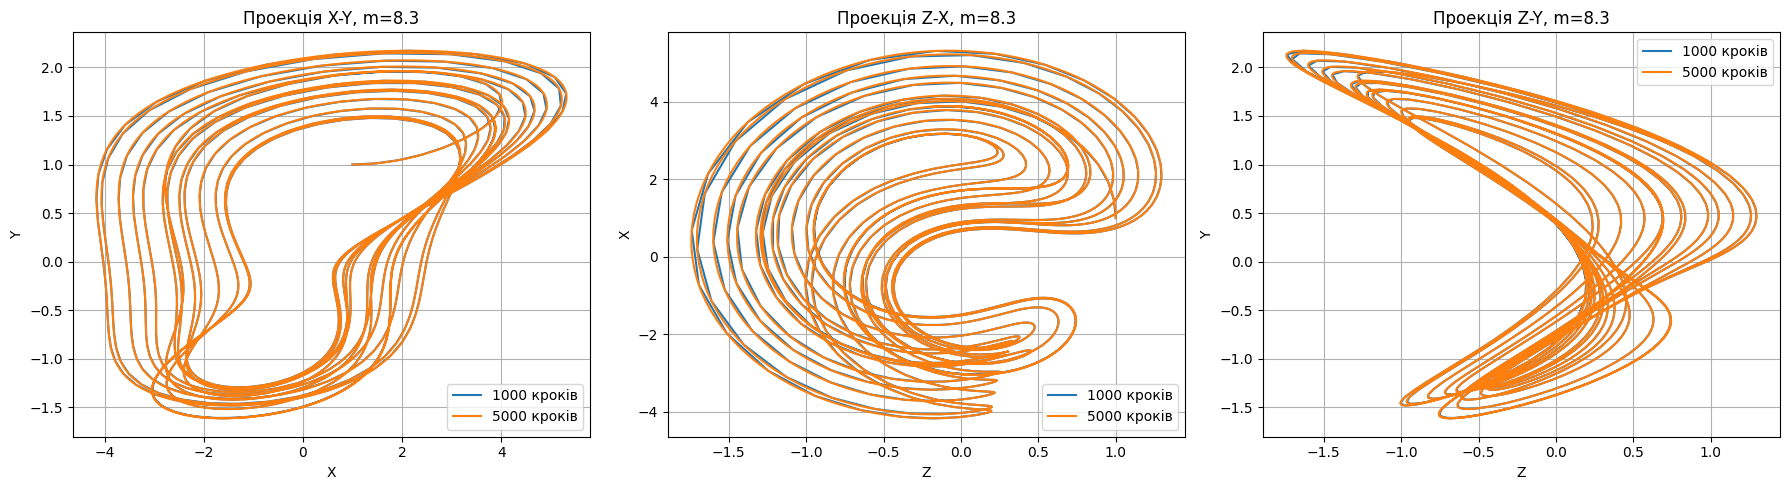

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# XY
for n, label in cases:
    t, x, y, z = solve_system_for_3_2(a, m, x0, y0, z0, t_max, n)
    axes[0].plot(x, y, label=f"{label}")
axes[0].set_xlabel("X"); axes[0].set_ylabel("Y")
axes[0].set_title(f"Проекція X-Y, m={m}")
axes[0].grid(); axes[0].legend()

# ZX
for n, label in cases:
    t, x, y, z = solve_system_for_3_2(a, m, x0, y0, z0, t_max, n)
    axes[1].plot(z, x, label=f"{label}")
axes[1].set_xlabel("Z"); axes[1].set_ylabel("X")
axes[1].set_title(f"Проекція Z-X, m={m}")
axes[1].grid(); axes[1].legend()

# ZY
for n, label in cases:
    t, x, y, z = solve_system_for_3_2(a, m, x0, y0, z0, t_max, n)
    axes[2].plot(z, y, label=f"{label}")
axes[2].set_xlabel("Z"); axes[2].set_ylabel("Y")
axes[2].set_title(f"Проекція Z-Y, m={m}")
axes[2].grid(); axes[2].legend()

plt.tight_layout()
plt.show()

Знайти дивергенцію та дослідити умови, за яких система буде дисипативною.


In [39]:
import sympy as sp
x, y, z, a, m = sp.symbols('x y z a m', real=True)

f1 = a + m*y*z
f2 = x - y
f3 = a - x*y

div_F = sp.diff(f1, x) + sp.diff(f2, y) + sp.diff(f3, z)
div_F

-1

divF=−1<0 -> система завжди дисипативна для будь-яких значень a та m, бо дивергенція постійно від’ємна.

In [40]:
eqs = [sp.Eq(f1, 0), sp.Eq(f2, 0), sp.Eq(f3, 0)]
stationary_points = sp.solve(eqs, (x, y, z), dict=True)
stationary_points

[{x: -sqrt(a), y: -sqrt(a), z: sqrt(a)/m},
 {x: sqrt(a), y: sqrt(a), z: -sqrt(a)/m}]

In [41]:
J = sp.Matrix([
    [sp.diff(f1, x), sp.diff(f1, y), sp.diff(f1, z)],
    [sp.diff(f2, x), sp.diff(f2, y), sp.diff(f2, z)],
    [sp.diff(f3, x), sp.diff(f3, y), sp.diff(f3, z)]
])

# Символьний характеристичний многочлен
lam = sp.symbols('lambda')
char_poly = J.charpoly(lam)
char_poly

PurePoly(lambda**3 + lambda**2 + (m*y**2 - m*z)*lambda + m*x*y + m*y**2, lambda, domain='ZZ[x,y,z,m]')

In [45]:
x0, y0, z0 = 1, 1, -1/m_star
char_poly_num = char_poly.as_expr().subs({x: x0, y: y0, z: z0, m: m_star})

# Чисельні власні числа λ
eigenvalues = sp.solve(char_poly_num, lam)
[e.evalf() for e in eigenvalues]

[-1.61330370744515,
 0.306651853722577 - 3.1930251777303*I,
 0.306651853722577 + 3.1930251777303*I]

стаціонарна точка (1,1,-1/m) є нестійкою.

Аналогічно можна обчислити для точки (-1,-1,1/m) – через симетрію динаміка буде дзеркальною, але тип власних чисел може змінитися по знаку.

In [46]:
# Чисельні координати стаціонарних точок
a_val = 1
m_val = 8.3

num_points = []
for pt in stationary_points:
    x_val = pt[x].evalf(subs={a: a_val, m: m_val})
    y_val = pt[y].evalf(subs={a: a_val, m: m_val})
    z_val = pt[z].evalf(subs={a: a_val, m: m_val})
    num_points.append((x_val, y_val, z_val))

num_points

[(-a**0.5, -a**0.5, 0.120481927710843*a**0.5),
 (a**0.5, a**0.5, -0.120481927710843*a**0.5)]

точки симетричні відносно початку координат, а z-координата визначається через 𝑚

Дослідити систему на чутливість до початкових умов та стійкість в околі кожної з особливих точок.
Для цього для фіксованих значень параметрів побудувати графіки розв’язків для точок з
координатами, близькими до координат особливих точок. (наприклад x1=1, y1=0, z1=0; x2=1.00001,
y2=0, z2=0).


In [52]:
a = 1
m_val = 8.3

x0_1, y0_1, z0_1 = 1, 1, -1/m_val
x0_2, y0_2, z0_2 = 1.00001, 1, -1/m_val

In [53]:
t, x1, y1, z1 = solve_system_for_3_2(a, m_val, x0_1, y0_1, z0_1)
t, x2, y2, z2 = solve_system_for_3_2(a, m_val, x0_2, y0_2, z0_2)

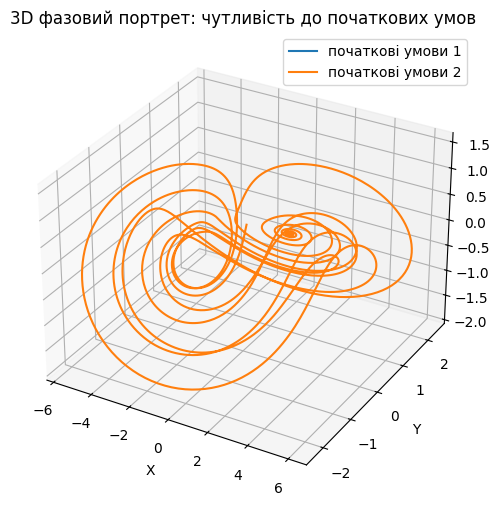

In [54]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1, label='початкові умови 1')
ax.plot(x2, y2, z2, label='початкові умови 2')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('3D фазовий портрет: чутливість до початкових умов')
ax.legend()
plt.show()

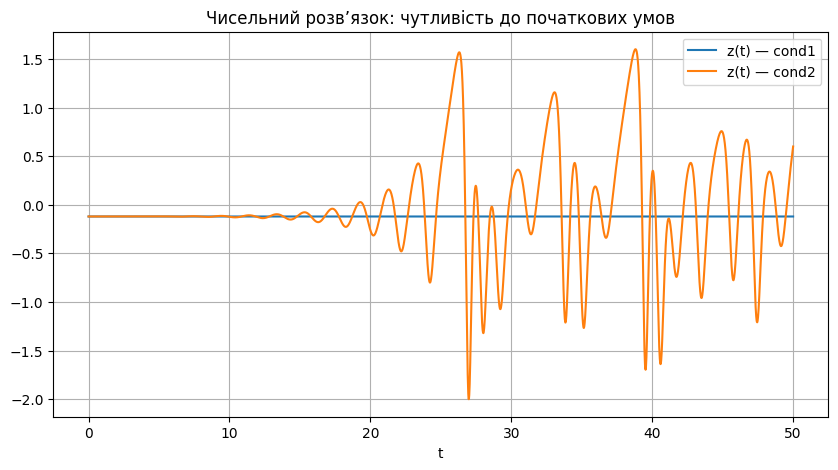

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
#ax.plot(t, x1, label='x(t) — cond1'); ax.plot(t, x2, label='x(t) — cond2')
#ax.plot(t, y1, label='y(t) — cond1'); ax.plot(t, y2, label='y(t) — cond2')
ax.plot(t, z1, label='z(t) — cond1'); ax.plot(t, z2, label='z(t) — cond2')
ax.set_xlabel('t'); ax.set_title('Чисельний розв’язок: чутливість до початкових умов')
ax.grid(); ax.legend()
plt.show()

Якщо траєкторії швидко розходяться – точка нестійка (чутливість до початкових умов висока).

Якщо траєкторії залишаються поблизу – точка стійка.

Чисельні графіки x(t), y(t), z(t) показують часові коливання: спочатку траєкторії майже ідентичні (пряма частина), а потім проявляється хаос і вони різко розходяться. Це ілюструє чутливість до початкових умов.